# Problem Statement:

This dataset includes details of applicants who have applied for loan.You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


here we can see missing values some columns and also notice that Dependent columns shows object type,so need to change it as integer.

In [88]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
def imput_nan_category(DataFrame,ColName):
    most_frequent_category=DataFrame[ColName].mode()[0]  
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName] 
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

function for impute nan value

In [90]:
for columns in ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']:
    imput_nan_category(df,columns)
    

Applying above function

In [91]:
df[["Gender","Gender_Imputed","Married","Married_Imputed","Dependents","Dependents_Imputed","Self_Employed","Self_Employed_Imputed","Credit_History","Credit_History_Imputed","Loan_Amount_Term","Loan_Amount_Term_Imputed"]]

,Gender,Gender_Imputed,Married,Married_Imputed,Dependents,Dependents_Imputed,Self_Employed,Self_Employed_Imputed,Credit_History,Credit_History_Imputed,Loan_Amount_Term,Loan_Amount_Term_Imputed
0,Male,Male,No,No,0,0,No,No,1.0,1.0,360.0,360.0
1,Male,Male,Yes,Yes,1,1,No,No,1.0,1.0,360.0,360.0
2,Male,Male,Yes,Yes,0,0,Yes,Yes,1.0,1.0,360.0,360.0
3,Male,Male,Yes,Yes,0,0,No,No,1.0,1.0,360.0,360.0
4,Male,Male,No,No,0,0,No,No,1.0,1.0,360.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,Female,No,No,0,0,No,No,1.0,1.0,360.0,360.0
610,Male,Male,Yes,Yes,3+,3+,No,No,1.0,1.0,180.0,180.0
611,Male,Male,Yes,Yes,1,1,No,No,1.0,1.0,360.0,360.0
612,Male,Male,Yes,Yes,2,2,No,No,1.0,1.0,360.0,360.0


After applying impute function I got this type data set . so drop the original columns from dataset

In [92]:
df = df.drop(["Gender","Married","Dependents","Self_Employed","Credit_History","Loan_Amount_Term"],axis=1)

In [93]:
df.loc[df["Loan_Status"]=='Y',["LoanAmount"]] = df.loc[df["Loan_Status"]=='Y',["LoanAmount"]].fillna(df.loc[df["Loan_Status"]=='Y',["LoanAmount"]].mean())


df.loc[df["Loan_Status"]=='N',["LoanAmount"]] = df.loc[df["Loan_Status"]=='N',["LoanAmount"]].fillna(df.loc[df["Loan_Status"]=='N',["LoanAmount"]].mean())


here fill the nan value of column loanAmount with Loan_status mean

In [94]:
df.isnull().sum()

Loan_ID                     0
Education                   0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Property_Area               0
Loan_Status                 0
Gender_Imputed              0
Married_Imputed             0
Dependents_Imputed          0
Self_Employed_Imputed       0
Credit_History_Imputed      0
Loan_Amount_Term_Imputed    0
dtype: int64

Finally clear all nan value with mean and mode

<AxesSubplot:xlabel='Education', ylabel='count'>

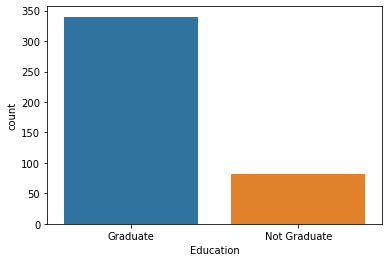

In [95]:
sns.countplot(x="Education",data=df[df["Loan_Status"]=="Y"])

people who have Graduate got approval for the loan

In [96]:
df["ApplicantIncome"].max()

81000

In [97]:
df["ApplicantIncome"].min()

150

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

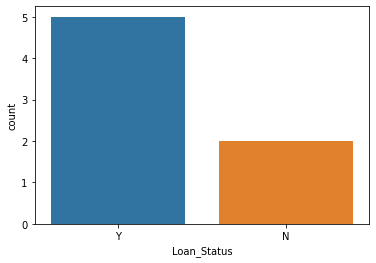

In [98]:
sns.countplot(x="Loan_Status",data=df[df["ApplicantIncome"]>30000])

Applicants who have more than 30000 Income has more prior to got approve loan

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

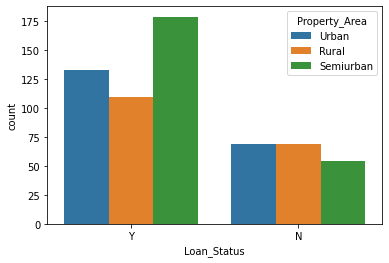

In [99]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)

people who have property in semiurban area more priority for approved loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

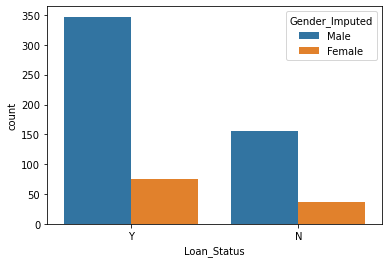

In [100]:
sns.countplot(x="Loan_Status",hue="Gender_Imputed",data=df)

here we can see there are more number of male applyinf for the loan compared to female and male loanes are approved

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

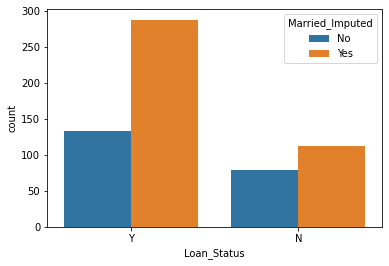

In [101]:
sns.countplot(x="Loan_Status",hue="Married_Imputed",data=df)

there are more than number of married person applyed for loan and they got approval.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

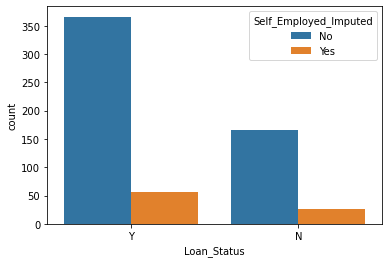

In [102]:
sns.countplot(x="Loan_Status",hue="Self_Employed_Imputed",data=df)

very less number of people who have self employed for applying loan and high number of approval got in other type employee

<AxesSubplot:xlabel='Dependents_Imputed', ylabel='ApplicantIncome'>

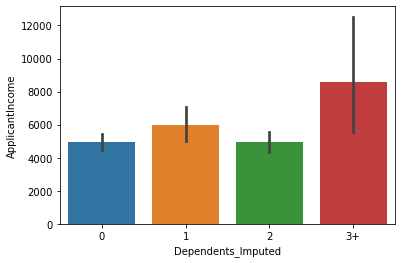

In [103]:
sns.barplot(x="Dependents_Imputed",y="ApplicantIncome",data=df)

split as input and output:

In [104]:
df_x = df.drop(columns=["Loan_Status"])

y = df[["Loan_Status"]]

In [105]:
df_x.drop(columns=["Loan_ID"],inplace= True)

droped unnecessery column

In [106]:
df_x = pd.get_dummies(df_x,drop_first=True)

convert object type data into numeric using get_dummies

In [107]:
df_x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_Imputed,Loan_Amount_Term_Imputed,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Gender_Imputed_Male,Married_Imputed_Yes,Dependents_Imputed_1,Dependents_Imputed_2,Dependents_Imputed_3+,Self_Employed_Imputed_Yes
0,5849,0.0,144.294404,1.0,360.0,0,0,1,1,0,0,0,0,0
1,4583,1508.0,128.000000,1.0,360.0,0,0,0,1,1,1,0,0,0
2,3000,0.0,66.000000,1.0,360.0,0,0,1,1,1,0,0,0,1
3,2583,2358.0,120.000000,1.0,360.0,1,0,1,1,1,0,0,0,0
4,6000,0.0,141.000000,1.0,360.0,0,0,1,1,0,0,0,0,0


In [108]:
y = LabelEncoder().fit_transform(y)

convert target column using LabelEncoder

scaling:

In [109]:
x = StandardScaler().fit_transform(df_x)

Model building:

In [110]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.8571428571428571 on random_state 8


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=8)

In [112]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    print("Accuracy score is:",acc)
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    plot_roc_curve(model,x_test,y_test)
    plt.title("Receiver operating characteristics")
    plt.xlabel("False positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()
    

Accuracy score is: 0.8594594594594595


              precision    recall  f1-score   support

           0       0.93      0.54      0.68        52
           1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.76      0.80       185
weighted avg       0.87      0.86      0.85       185





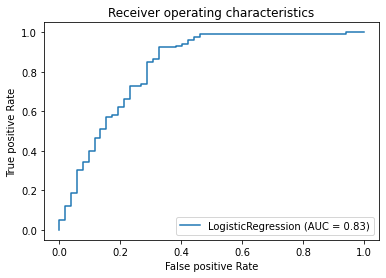

In [113]:
eval(LogisticRegression())

accuracy is good but here we can see that there are lots of differents in f1 score and recall.lets try another

Accuracy score is: 0.8324324324324325


              precision    recall  f1-score   support

           0       0.80      0.54      0.64        52
           1       0.84      0.95      0.89       133

    accuracy                           0.83       185
   macro avg       0.82      0.74      0.77       185
weighted avg       0.83      0.83      0.82       185





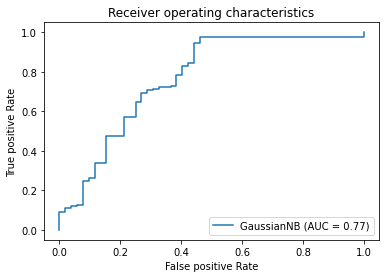

In [114]:
eval(GaussianNB())

LogisticRegression is better than GussianNB

Accuracy score is: 0.8378378378378378


              precision    recall  f1-score   support

           0       0.81      0.56      0.66        52
           1       0.85      0.95      0.89       133

    accuracy                           0.84       185
   macro avg       0.83      0.75      0.78       185
weighted avg       0.83      0.84      0.83       185





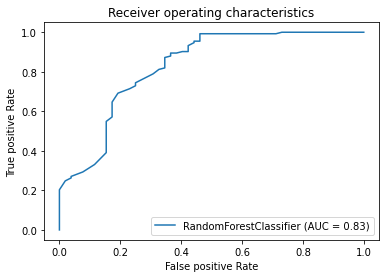

In [115]:
eval(RandomForestClassifier())

LogisticRegression is the good model.

Hyper parameter tuning:

In [116]:
lr=LogisticRegression()
parameter = {'C':10.0 **np.arange(-2,3),
            'penalty':['l1','l2','elasticnet','none'],
            'solver':['newton-cg','lbfgs','saga']}

cv=KFold(n_splits=5,random_state=None,shuffle=False)

gcv=GridSearchCV(lr,parameter,cv=cv)

In [117]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [118]:
gcv.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [119]:
lr_new=LogisticRegression(C=0.1,penalty='l1',solver='saga')
lr_new.fit(x_train,y_train)
pred=lr_new.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8648648648648649
              precision    recall  f1-score   support

           0       0.97      0.54      0.69        52
           1       0.85      0.99      0.91       133

    accuracy                           0.86       185
   macro avg       0.91      0.77      0.80       185
weighted avg       0.88      0.86      0.85       185



Now its improve performance from 85 to 86

conclusion:

LogisticRegression is my best model and its final accuracy is 86

In [120]:
import joblib
joblib.dump(lr_new,"rf_loan.pkl")

['rf_loan.pkl']